<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L230828_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 데이터 그룹 연산
    - groupby, apply
2. 시계열 데이터 분석
3. 교재 : chapter 2 ~ 6

4. 파이썬 생활프로그래밍 Chap. 5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [ ]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [ ]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [ ]:
pd.merge(left, right, on='key') # 교집합

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [ ]:
pd.merge(left, right, on='key',how = 'inner') # 교집합

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [ ]:
pd.merge(left, right, on='key', how = 'left')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [ ]:
pd.merge(left, right, on='key', how = 'right')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [ ]:
pd.merge(left, right, on='key', how = 'outer') #합집합

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [ ]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [ ]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [ ]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [ ]:
pd.concat([df1, df2, df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [ ]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [ ]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [ ]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [ ]:
pd.concat([df1, df4], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [ ]:
pd.concat([df1, df4], axis=1, join='inner')

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


http://data.seoul.go.kr/dataList/OA-2734/F/1/datasetView.do

https://data.seoul.go.kr/dataList/419/S/2/datasetView.do

In [ ]:
ls

 sample_data/
'서울시 자치구 년도별 CCTV 설치 현황_230630기준.csv'
 주민등록인구_20230828092255.csv


In [ ]:
cp '서울시 자치구 년도별 CCTV 설치 현황_230630기준.csv' ./CCTV_Seoul.csv

In [ ]:
ls

 CCTV_Seoul.csv  '서울시 자치구 년도별 CCTV 설치 현황_230630기준.csv'
 sample_data/     주민등록인구_20230828092255.csv


In [ ]:
cat CCTV_Seoul.csv

In [ ]:
cp 주민등록인구_20230828092255.csv ./POP_Seoul.csv

In [ ]:
ls

 CCTV_Seoul.csv  '서울시 자치구 년도별 CCTV 설치 현황_230630기준.csv'
 POP_Seoul.csv    주민등록인구_20230828092255.csv
 sample_data/


In [ ]:
cat POP_Seoul.csv

﻿"동별(1)",동별(2),2023 1/4,2023 1/4,2023 1/4,2023 1/4,2023 1/4,2023 1/4,2023 2/4,2023 2/4,2023 2/4,2023 2/4,2023 2/4
"동별(1)",동별(2),세대 (세대),계 (명),한국인 (명),등록외국인 (명),세대당인구 (명),65세이상고령자 (명),세대 (세대),계 (명),한국인 (명),등록외국인 (명),인구밀도
"합계",소계,4463385,9668008,9426404,241604,2.11,1690961,4469158,9659322,9414093,245229,2
"합계",종로구,72679,152212,141060,11152,1.94,28265,72507,151349,140397,10952,2
"합계",중구,63862,131390,120963,10427,1.89,25353,64375,132054,121441,10613,2
"합계",용산구,109735,232482,217756,14726,1.98,39478,109679,232069,217288,14781,2
"합계",성동구,133513,287240,280240,7000,2.10,48238,133484,286564,279374,7190,2
"합계",광진구,169787,350925,336801,14124,1.98,54854,169857,350820,336169,14651,2
"합계",동대문구,171140,354884,337574,17310,1.97,65154,171703,355667,338115,17552,2
"합계",중랑구,187898,389928,385003,4925,2.05,76116,187981,389316,384272,5044,2
"합계",성북구,197859,441855,430100,11755,2.17,78427,197831,441065,429142,11923,2
"합계",강북구,144557,296934,292762,4172,2.03,67056,144447,295773,291384,4389,2
"합계",도봉구,138376,31285

In [ ]:
cp CCTV_Seoul.csv ./drive/MyDrive/

CCTV  데이터의 '자치구' 와

인구 데이터의 '자치구' 를 key 로 하여  merge 해주세요..

cctv : '총계'

인구자료 : "계 (명)"

파일 읽어 들일때 문제 해결

1. NaN

2. 숫자 처리
    1,200

3. encoding

4. 서울 25개구, 실수 확인, 칼럼은 "구, CCTV 총계, 총 인구수 "

5. merge 할때 (1개의 구가 누락되는 문제 해결)

In [ ]:
data

,gu,cctv_total,total
0,종로구,1980,152212
1,중구,2584,131390
2,용산구,2847,232482
3,성동구,4047,287240
4,광진구,3480,350925
5,동대문구,2759,354884
6,중랑구,4193,389928
7,성북구,4842,441855
8,강북구,3321,296934
9,도봉구,2247,312858


In [ ]:
file_name = './CCTV_Seoul.csv'

In [ ]:
cctv = pd.read_csv(file_name, encoding='euc-kr', thousands=',', header=[0], skiprows=[1])

In [ ]:
cctv.head()

,Unnamed: 0,구분,총계,2014년 이전,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,1,종로구,1966,553.0,103,160,130,144,150,67,233,88,207,131.0
1,2,중 구,2584,217.0,77,236,240,372,386,155,361,403,137,0.0
2,3,용산구,2970,87.0,68,83,295,491,115,322,623,422,464,0.0
3,4,성동구,4175,157.0,110,366,281,942,457,643,485,367,232,135.0
4,5,광진구,3592,130.0,176,95,40,666,460,712,190,738,273,112.0


dropna(how='all',axis=1)

In [ ]:
cctv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25 non-null     int64  
 1   구분          25 non-null     object 
 2   총계          25 non-null     int64  
 3   2014년 이전    24 non-null     float64
 4   2014년       25 non-null     int64  
 5   2015년       25 non-null     int64  
 6   2016년       25 non-null     int64  
 7   2017년       25 non-null     int64  
 8   2018년       25 non-null     int64  
 9   2019년       25 non-null     int64  
 10  2020년       25 non-null     int64  
 11  2021년       25 non-null     int64  
 12  2022년       25 non-null     int64  
 13  2023년       22 non-null     float64
dtypes: float64(2), int64(11), object(1)
memory usage: 2.9+ KB


In [ ]:
file_pop = './POP_Seoul.csv'

In [ ]:
pop_Seoul = pd.read_csv(file_pop, skiprows=[0,2], header=[0], encoding='utf-8')
pop_Seoul.head()

,동별(1),동별(2),세대 (세대),계 (명),한국인 (명),등록외국인 (명),세대당인구 (명),65세이상고령자 (명),세대 (세대).1,계 (명).1,한국인 (명).1,등록외국인 (명).1,인구밀도
0,합계,종로구,72679,152212,141060,11152,1.94,28265,72507,151349,140397,10952,2
1,합계,중구,63862,131390,120963,10427,1.89,25353,64375,132054,121441,10613,2
2,합계,용산구,109735,232482,217756,14726,1.98,39478,109679,232069,217288,14781,2
3,합계,성동구,133513,287240,280240,7000,2.10,48238,133484,286564,279374,7190,2
4,합계,광진구,169787,350925,336801,14124,1.98,54854,169857,350820,336169,14651,2


In [ ]:
cat POP_Seoul.csv

In [ ]:
pop_data = pop_Seoul.loc[:, [pop_Seoul.columns[1],pop_Seoul.columns[3]]]

In [ ]:
pop_data

,동별(2),계 (명)
0,종로구,152212
1,중구,131390
2,용산구,232482
3,성동구,287240
4,광진구,350925
5,동대문구,354884
6,중랑구,389928
7,성북구,441855
8,강북구,296934
9,도봉구,312858


In [ ]:
pop_data.columns = ['gu', 'pop_total']

In [ ]:
pop_data

,gu,pop_total
0,종로구,152212
1,중구,131390
2,용산구,232482
3,성동구,287240
4,광진구,350925
5,동대문구,354884
6,중랑구,389928
7,성북구,441855
8,강북구,296934
9,도봉구,312858


In [ ]:
cctv.head()

,Unnamed: 0,구분,총계,2014년 이전,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,1,종로구,1966,553.0,103,160,130,144,150,67,233,88,207,131.0
1,2,중 구,2584,217.0,77,236,240,372,386,155,361,403,137,0.0
2,3,용산구,2970,87.0,68,83,295,491,115,322,623,422,464,0.0
3,4,성동구,4175,157.0,110,366,281,942,457,643,485,367,232,135.0
4,5,광진구,3592,130.0,176,95,40,666,460,712,190,738,273,112.0


In [ ]:
cctv.rename(columns={'구분':'gu', '총계':'cctv_total'},inplace=True )

In [ ]:
cctv.head()

,Unnamed: 0,gu,cctv_total,2014년 이전,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,1,종로구,1966,553.0,103,160,130,144,150,67,233,88,207,131.0
1,2,중 구,2584,217.0,77,236,240,372,386,155,361,403,137,0.0
2,3,용산구,2970,87.0,68,83,295,491,115,322,623,422,464,0.0
3,4,성동구,4175,157.0,110,366,281,942,457,643,485,367,232,135.0
4,5,광진구,3592,130.0,176,95,40,666,460,712,190,738,273,112.0


In [ ]:
cctv_data = cctv[['gu', 'cctv_total']]

In [ ]:
cctv_data

,gu,cctv_total
0,종로구,1966
1,중 구,2584
2,용산구,2970
3,성동구,4175
4,광진구,3592
5,동대문구,2759
6,중랑구,4193
7,성북구,4957
8,강북구,3321
9,도봉구,2385


In [ ]:
cctv_data

,gu,cctv_total
0,종로구,1966
1,중 구,2584
2,용산구,2970
3,성동구,4175
4,광진구,3592
5,동대문구,2759
6,중랑구,4193
7,성북구,4957
8,강북구,3321
9,도봉구,2385


In [ ]:
pop_data

,gu,pop_total
0,종로구,152212
1,중구,131390
2,용산구,232482
3,성동구,287240
4,광진구,350925
5,동대문구,354884
6,중랑구,389928
7,성북구,441855
8,강북구,296934
9,도봉구,312858


In [ ]:
pd.merge(cctv_data, pop_data, on='gu')

,gu,cctv_total,pop_total
0,종로구,1966,152212
1,용산구,2970,232482
2,성동구,4175,287240
3,광진구,3592,350925
4,동대문구,2759,354884
5,중랑구,4193,389928
6,성북구,4957,441855
7,강북구,3321,296934
8,도봉구,2385,312858
9,노원구,2626,506989


In [ ]:
gu_list=list(cctv_data.gu)
for i in pop_data.gu:
    if i in gu_list:
        pass
    else:
        print(i)

중구


In [ ]:
cctv_data.gu

0      종로구
1      중 구
2      용산구
3      성동구
4      광진구
5     동대문구
6      중랑구
7      성북구
8      강북구
9      도봉구
10     노원구
11     은평구
12    서대문구
13     마포구
14     양천구
15     강서구
16     구로구
17     금천구
18    영등포구
19     동작구
20     관악구
21     서초구
22     강남구
23     송파구
24     강동구
Name: gu, dtype: object

In [ ]:
cctv_data.loc[1,'gu'] = '중구'

In [ ]:
cctv_data.head()

,gu,cctv_total
0,종로구,1966
1,중구,2584
2,용산구,2970
3,성동구,4175
4,광진구,3592


In [ ]:
pop_data.head()

,gu,pop_total
0,종로구,152212
1,중구,131390
2,용산구,232482
3,성동구,287240
4,광진구,350925


In [ ]:
data = pd.merge(cctv_data, pop_data, on='gu')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gu          25 non-null     object
 1   cctv_total  25 non-null     int64 
 2   pop_total   25 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 800.0+ bytes


In [ ]:
data

,gu,cctv_total,pop_total
0,종로구,1966,152212
1,중구,2584,131390
2,용산구,2970,232482
3,성동구,4175,287240
4,광진구,3592,350925
5,동대문구,2759,354884
6,중랑구,4193,389928
7,성북구,4957,441855
8,강북구,3321,296934
9,도봉구,2385,312858


종속변수 : y = f(x)

독립변수 : x

f(x) = x1 + x2 + x3 + 1

선형성 : 종속변수와 독립변수 간의 선형 관계

    선형
        가산성 (Additivity) : f(x1 + x2) = f(x1) + f(x2)

        동차성 (Homogeneity) : f(kx) = kf(x)

        https://satlab.tistory.com/90


독립성 : 다중 회귀에서, 독립 변수들 간의 통계적 독립성 (비 다중공선성)

    다중공선성(multicollinearity)란 독립 변수의 일부가 다른 독립 변수의 조합으로 표현될 수 있는 경우이다.

    통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제이다.

등분산성 : 잔차들의 분산이 일정

정규성 : 잔차들의 분포가 정규 분포를 이룸

1. sklearn 이용

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
data.cctv_total.shape

(25,)

In [ ]:
data.pop_total.shape

(25,)

In [ ]:
data.shape

(25, 3)

y = cctv 개수

x = 인구수

In [ ]:
data.pop_total

0     152212
1     131390
2     232482
3     287240
4     350925
5     354884
6     389928
7     441855
8     296934
9     312858
10    506989
11    468766
12    321966
13    376542
14    442345
15    573711
16    417983
17    242467
18    398999
19    390377
20    502628
21    408979
22    537817
23    663704
24    464027
Name: pop_total, dtype: int64

In [ ]:
x = data.pop_total[:, np.newaxis]

<ipython-input-73-99567e8d120d>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = data.pop_total[:, np.newaxis]


In [ ]:
x.shape

(25, 1)

In [ ]:
x

array([[152212],
       [131390],
       [232482],
       [287240],
       [350925],
       [354884],
       [389928],
       [441855],
       [296934],
       [312858],
       [506989],
       [468766],
       [321966],
       [376542],
       [442345],
       [573711],
       [417983],
       [242467],
       [398999],
       [390377],
       [502628],
       [408979],
       [537817],
       [663704],
       [464027]])

In [ ]:
x =data.pop_total.values.reshape(-1, 1)

In [ ]:
x

array([[152212],
       [131390],
       [232482],
       [287240],
       [350925],
       [354884],
       [389928],
       [441855],
       [296934],
       [312858],
       [506989],
       [468766],
       [321966],
       [376542],
       [442345],
       [573711],
       [417983],
       [242467],
       [398999],
       [390377],
       [502628],
       [408979],
       [537817],
       [663704],
       [464027]])

In [ ]:
y = data.cctv_total

In [ ]:
y

0     1966
1     2584
2     2970
3     4175
4     3592
5     2759
6     4193
7     4957
8     3321
9     2385
10    2626
11    4653
12    3538
13    2638
14    3890
15    3353
16    4831
17    2885
18    4660
19    2690
20    5642
21    4995
22    7243
23    3253
24    3192
Name: cctv_total, dtype: int64

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x, y)

LinearRegression()

y = ax + b

a : coef_

b : intercept_

In [ ]:
model.coef_

array([0.00449036])

In [ ]:
model.intercept_

1983.127310077079

In [ ]:
data['predict_lr'] = model.predict(x)

In [ ]:
data.head()

,gu,cctv_total,pop_total,predict_lr
0,종로구,1966,152212,2666.613685
1,중구,2584,131390,2573.115450
2,용산구,2970,232482,3027.054723
3,성동구,4175,287240,3272.937747
4,광진구,3592,350925,3558.906198


2. numpy 이용

In [ ]:
fp1 = np.polyfit(data.pop_total, data.cctv_total, 1)

In [ ]:
fp1

array([4.49035802e-03, 1.98312731e+03])

In [ ]:
type(fp1)

numpy.ndarray

In [ ]:
func = np.poly1d(fp1)

In [ ]:
data['predict'] = func(data.pop_total)

In [ ]:
data.head()

,gu,cctv_total,pop_total,predict_lr,predict
0,종로구,1966,152212,2666.613685,2666.613685
1,중구,2584,131390,2573.115450,2573.115450
2,용산구,2970,232482,3027.054723,3027.054723
3,성동구,4175,287240,3272.937747,3272.937747
4,광진구,3592,350925,3558.906198,3558.906198


In [ ]:
data['res'] = data.cctv_total - data.predict_lr

In [ ]:
data.head()

,gu,cctv_total,pop_total,predict_lr,predict,res
0,종로구,1966,152212,2666.613685,2666.613685,-700.613685
1,중구,2584,131390,2573.115450,2573.115450,10.884550
2,용산구,2970,232482,3027.054723,3027.054723,-57.054723
3,성동구,4175,287240,3272.937747,3272.937747,902.062253
4,광진구,3592,350925,3558.906198,3558.906198,33.093802


In [ ]:
data_sort = data.sort_values(by='res', ascending=False)

In [ ]:
data_sort.head()

,gu,cctv_total,pop_total,predict_lr,predict,res
22,강남구,7243,537817,4398.118189,4398.118189,2844.881811
20,관악구,5642,502628,4240.106980,4240.106980,1401.893020
21,서초구,4995,408979,3819.589442,3819.589442,1175.410558
7,성북구,4957,441855,3967.214452,3967.214452,989.785548
16,구로구,4831,417983,3860.020626,3860.020626,970.979374


In [ ]:
data_sort = data_sort.reset_index(drop=True)

In [ ]:
data_sort.head()

,gu,cctv_total,pop_total,predict_lr,predict,res
0,강남구,7243,537817,4398.118189,4398.118189,2844.881811
1,관악구,5642,502628,4240.106980,4240.106980,1401.893020
2,서초구,4995,408979,3819.589442,3819.589442,1175.410558
3,성북구,4957,441855,3967.214452,3967.214452,989.785548
4,구로구,4831,417983,3860.020626,3860.020626,970.979374


In [ ]:
data_sort.drop(['predict'], axis=1, inplace=True)

In [ ]:
data_sort

,gu,cctv_total,pop_total,predict_lr,res
0,강남구,7243,537817,4398.118189,2844.881811
1,관악구,5642,502628,4240.106980,1401.893020
2,서초구,4995,408979,3819.589442,1175.410558
3,성북구,4957,441855,3967.214452,989.785548
4,구로구,4831,417983,3860.020626,970.979374
5,성동구,4175,287240,3272.937747,902.062253
6,영등포구,4660,398999,3774.775669,885.224331
7,은평구,4653,468766,4088.054477,564.945523
8,중랑구,4193,389928,3734.043632,458.956368
9,서대문구,3538,321966,3428.869920,109.130080


In [ ]:
from matplotlib import font_manager
font_path = './drive/MyDrive/NanumGothic.ttf'
fontprop = font_manager.FontProperties(fname=font_path, size=20)

In [ ]:
ls ./drive/MyDrive/*.ttf

./drive/MyDrive/NanumGothic.ttf


In [ ]:
data_sort.head()

,gu,cctv_total,pop_total,predict_lr,res
0,강남구,7243,537817,4398.118189,2844.881811
1,관악구,5642,502628,4240.106980,1401.893020
2,서초구,4995,408979,3819.589442,1175.410558
3,성북구,4957,441855,3967.214452,989.785548
4,구로구,4831,417983,3860.020626,970.979374


In [ ]:
data_sort.tail()

,gu,cctv_total,pop_total,predict_lr,res
20,마포구,2638,376542,3673.935699,-1035.935699
21,동작구,2690,390377,3736.059802,-1046.059802
22,강서구,3353,573711,4559.295099,-1206.295099
23,노원구,2626,506989,4259.689432,-1633.689432
24,송파구,3253,663704,4963.395889,-1710.395889


plt.text( x 위치, y 위치, 텍스트문자)

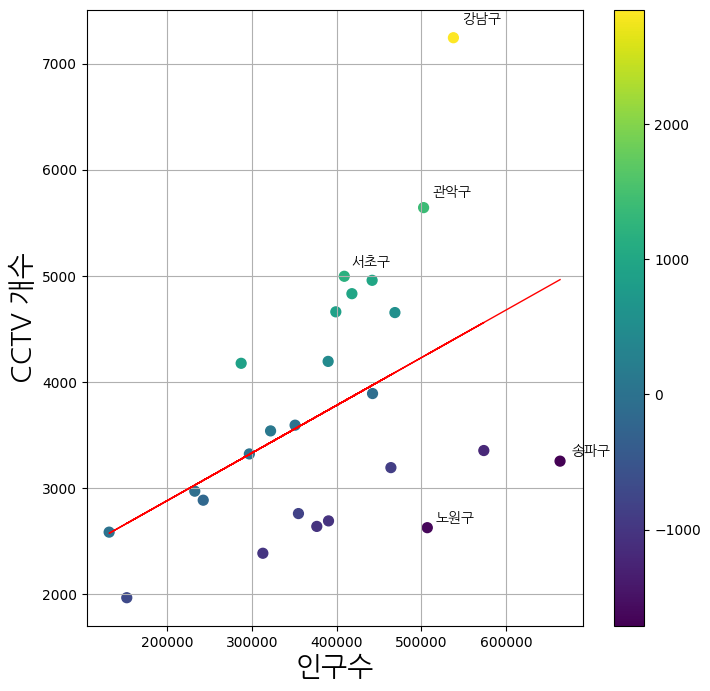

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(data_sort.pop_total, data_sort.cctv_total, c=data_sort.res, s=50)
plt.plot(data_sort.pop_total, data_sort.predict_lr, ls='-', lw=1, color='r')

for n in range(3):
    plt.text(data_sort.loc[n,'pop_total']*1.02, data_sort.loc[n, 'cctv_total']*1.02,
             data_sort.loc[n, 'gu'], fontsize=10, fontproperties=fontprop)
for n in range(23,25):
    plt.text(data_sort.loc[n,'pop_total']*1.02, data_sort.loc[n, 'cctv_total']*1.02,
             data_sort.loc[n, 'gu'], fontsize=10, fontproperties=fontprop)
plt.colorbar()
plt.grid()
plt.ylabel('CCTV 개수', fontproperties=fontprop)
plt.xlabel('인구수', fontproperties=fontprop)
plt.show()

---
---
Groupby

In [ ]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : [1,2,3,4,5],
                   'data2' : [10,20,30,40,50]})

In [ ]:
df

,key1,key2,data1,data2
0,a,one,1,10
1,a,two,2,20
2,b,one,3,30
3,b,two,4,40
4,a,one,5,50


In [ ]:
grouped = df['data1'].groupby(df['key1'])

In [ ]:
grouped

In [ ]:
grouped.sum()

key1
a    8
b    7
Name: data1, dtype: int64

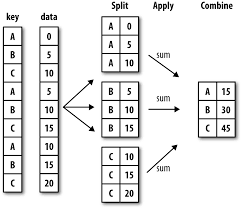

In [ ]:
df['data1']

0    1
1    2
2    3
3    4
4    5
Name: data1, dtype: int64

In [ ]:
df

,key1,key2,data1,data2
0,a,one,1,10
1,a,two,2,20
2,b,one,3,30
3,b,two,4,40
4,a,one,5,50


In [ ]:
df['data1'].groupby(df['key1']).sum()

key1
a    8
b    7
Name: data1, dtype: int64

8 = 1 + 2 + 5

7 = 3 + 4

In [ ]:
df['data1'].groupby(df['key2']).sum()

key2
one    9
two    6
Name: data1, dtype: int64

In [ ]:
grouped.mean()

key1
a    2.666667
b    3.500000
Name: data1, dtype: float64

In [ ]:
sums = df['data1'].groupby([df['key1'], df['key2']]).sum()

In [ ]:
df

,key1,key2,data1,data2
0,a,one,1,10
1,a,two,2,20
2,b,one,3,30
3,b,two,4,40
4,a,one,5,50


In [ ]:
sums

key1  key2
a     one     6
      two     2
b     one     3
      two     4
Name: data1, dtype: int64

In [ ]:
sums.unstack()

key2,one,two
key1,,
a,6,2
b,3,4


In [ ]:
means = df['data2'].groupby([df['key1'], df['key2']]).mean()

In [ ]:
df

,key1,key2,data1,data2
0,a,one,1,10
1,a,two,2,20
2,b,one,3,30
3,b,two,4,40
4,a,one,5,50


In [ ]:
means

key1  key2
a     one     30.0
      two     20.0
b     one     30.0
      two     40.0
Name: data2, dtype: float64

In [ ]:
df

,key1,key2,data1,data2
0,a,one,1,10
1,a,two,2,20
2,b,one,3,30
3,b,two,4,40
4,a,one,5,50


In [ ]:
df.groupby('key1').sum()

<ipython-input-144-e96d311ec841>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('key1').sum()


,data1,data2
key1,,
a,8,80
b,7,70


In [ ]:
df.groupby(['key1', 'key2']).sum()

data1  data2
key1 key2              
a    one       6     60
     two       2     20
b    one       3     30
     two       4     40

In [ ]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [ ]:
df.groupby(['key1', 'key2']).mean()

data1  data2
key1 key2              
a    one     3.0   30.0
     two     2.0   20.0
b    one     3.0   30.0
     two     4.0   40.0

In [ ]:
df

,key1,key2,data1,data2
0,a,one,1,10
1,a,two,2,20
2,b,one,3,30
3,b,two,4,40
4,a,one,5,50


In [ ]:
df.index = ['k', 'k', 'k', 'j', 'j']

In [ ]:
df

,key1,key2,data1,data2
k,a,one,1,10
k,a,two,2,20
k,b,one,3,30
j,b,two,4,40
j,a,one,5,50


In [ ]:
grouped=df.groupby(lambda x : x)

In [ ]:
for i in grouped:
    print(i)

('j',   key1 key2  data1  data2
j    b  two      4     40
j    a  one      5     50)
('k',   key1 key2  data1  data2
k    a  one      1     10
k    a  two      2     20
k    b  one      3     30)


In [ ]:
grouped = df['data1'].groupby(df['key1'])
for i in grouped:
    print(i)

('a', k    1
k    2
j    5
Name: data1, dtype: int64)
('b', k    3
j    4
Name: data1, dtype: int64)


In [ ]:
for i in enumerate([10, 20, 30]):
    print(i)

(0, 10)
(1, 20)
(2, 30)


In [ ]:
for i, j in enumerate([10, 20, 30]):
    print(i)
    print(j)

0
10
1
20
2
30


In [ ]:
for i, j in grouped:
    print(i)
    print('-'*20)
    print(j)
    print('+'*20)

a
--------------------
k    1
k    2
j    5
Name: data1, dtype: int64
++++++++++++++++++++
b
--------------------
k    3
j    4
Name: data1, dtype: int64
++++++++++++++++++++


In [ ]:
df

,key1,key2,data1,data2
k,a,one,1,10
k,a,two,2,20
k,b,one,3,30
j,b,two,4,40
j,a,one,5,50


In [ ]:
grouped=df.groupby(lambda x : x) #
for group_name, group_data in grouped:
    print(group_name)
    print('-'*20)
    print(group_data)
    print('+'*20)

j
--------------------
  key1 key2  data1  data2
j    b  two      4     40
j    a  one      5     50
++++++++++++++++++++
k
--------------------
  key1 key2  data1  data2
k    a  one      1     10
k    a  two      2     20
k    b  one      3     30
++++++++++++++++++++


In [ ]:
gpd = df.groupby(lambda x : x) # x 에는 df 의 인덱스 값들이 자동으로 들어오게 된다.

In [ ]:
df

,key1,key2,data1,data2
k,a,one,1,10
k,a,two,2,20
k,b,one,3,30
j,b,two,4,40
j,a,one,5,50


In [ ]:
for key, data in gpd:
    print('key :', key)
    print('===================')
    print('data : ')
    print(data)

key : j
data : 
  key1 key2  data1  data2
j    b  two      4     40
j    a  one      5     50
key : k
data : 
  key1 key2  data1  data2
k    a  one      1     10
k    a  two      2     20
k    b  one      3     30


In [ ]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max_Speed': [380., 370., 24., 26.]})

In [ ]:
df

,Animal,Max_Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


Animal 로 그룹화하고, Max_Speed에 대해 평균, 합계를 구해 주세요.

In [ ]:
grouped = df['Max_Speed'].groupby(df['Animal'])

In [ ]:
grouped.mean()

Animal
Falcon    375.0
Parrot     25.0
Name: Max_Speed, dtype: float64

In [ ]:
grouped.sum()

Animal
Falcon    750.0
Parrot     50.0
Name: Max_Speed, dtype: float64

In [ ]:
df.Max_Speed.groupby(df['Animal']).mean()

Animal
Falcon    375.0
Parrot     25.0
Name: Max_Speed, dtype: float64

In [ ]:
arrays = [['Falcon', 'Falcon', 'Parrot', 'Parrot'],
          ['Captive', 'Wild', 'Captive', 'Wild']]
index = pd.MultiIndex.from_arrays(arrays, names=('Animal', 'Type'))
df = pd.DataFrame({'Max_Speed': [350., 390., 20., 30.]},
                  index=index)

In [ ]:
df

Max_Speed
Animal Type              
Falcon Captive      350.0
       Wild         390.0
Parrot Captive       20.0
       Wild          30.0

In [ ]:
df.groupby(level=0).sum()

,Max_Speed
Animal,
Falcon,740.0
Parrot,50.0


In [ ]:
df.groupby(level=1).sum()

,Max_Speed
Type,
Captive,370.0
Wild,420.0


In [ ]:
gpd = df.Max_Speed.groupby(level=0)
gpd.mean()

Animal
Falcon    370.0
Parrot     25.0
Name: Max_Speed, dtype: float64

In [ ]:
gpd.min()

Animal
Falcon    350.0
Parrot     20.0
Name: Max_Speed, dtype: float64

In [ ]:
df.groupby(level='Animal').mean()

,Max_Speed
Animal,
Falcon,370.0
Parrot,25.0


In [ ]:
list_s = [[1, 2, 3], [1, None, 4], [2, 1, 3], [1, 2, 2]]
df = pd.DataFrame(list_s, columns=["a", "b", "c"])

In [ ]:
df

,a,b,c
0,1,2.0,3
1,1,NaN,4
2,2,1.0,3
3,1,2.0,2


In [ ]:
df.groupby(by=['b']).sum()

,a,c
b,,
1.0,2,3
2.0,2,5


In [ ]:
df.groupby(by=['b'], dropna=False).sum()

,a,c
b,,
1.0,2,3
2.0,2,5
NaN,1,4


In [ ]:
df = pd.DataFrame({'상품번호' : ['P1', 'P1', 'P2', 'P2'],
                   '수량' :     [2, 3, 5, 10]})

In [ ]:
df

,상품번호,수량
0,P1,2
1,P1,3
2,P2,5
3,P2,10


In [ ]:
df.groupby(by=['상품번호']).sum()

,수량
상품번호,
P1,5
P2,15


In [ ]:
df.groupby(by=['상품번호']).min()

,수량
상품번호,
P1,2
P2,5


In [ ]:
df.groupby(by=['상품번호']).count()

,수량
상품번호,
P1,2
P2,2


In [ ]:
df.groupby(by=['상품번호'], as_index=False).count()

,상품번호,수량
0,P1,2
1,P2,2


In [ ]:
df = pd.DataFrame({'고객번호' : ['C1', 'C2', 'C2', 'C2'],
                   '상품번호' : ['P1', 'P1', 'P2', 'P2'],
                   '수량' :     [2, 3, 5, 10]})

In [ ]:
df

,고객번호,상품번호,수량
0,C1,P1,2
1,C2,P1,3
2,C2,P2,5
3,C2,P2,10


고객번호, 상품번호로 그룹화하고 합계를 내어 주세요.

In [ ]:
df.groupby(['고객번호', '상품번호'], as_index=False).sum()

,고객번호,상품번호,수량
0,C1,P1,2
1,C2,P1,3
2,C2,P2,15


In [ ]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : [1,2,3,4,5],
                   'data2' : [10,20,30,40,50]})

In [ ]:
df

,key1,key2,data1,data2
0,a,one,1,10
1,a,two,2,20
2,b,one,3,30
3,b,two,4,40
4,a,one,5,50


In [ ]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print(k1, k2)
    print(group)
    print('============')

a one
  key1 key2  data1  data2
0    a  one      1     10
4    a  one      5     50
a two
  key1 key2  data1  data2
1    a  two      2     20
b one
  key1 key2  data1  data2
2    b  one      3     30
b two
  key1 key2  data1  data2
3    b  two      4     40


In [ ]:
 g = list(df.groupby(['key1']))

<ipython-input-204-61c199a1b46e>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  g = list(df.groupby(['key1']))


In [ ]:
g[0][1]

,key1,key2,data1,data2
0,a,one,1,10
1,a,two,2,20
4,a,one,5,50


In [ ]:
d_g = dict(g)

In [ ]:
d_g

{'a':   key1 key2  data1  data2
 0    a  one      1     10
 1    a  two      2     20
 4    a  one      5     50,
 'b':   key1 key2  data1  data2
 2    b  one      3     30
 3    b  two      4     40}

In [ ]:
d_g['b']

,key1,key2,data1,data2
2,b,one,3,30
3,b,two,4,40


In [ ]:
df.groupby(['key1', 'key2'])['data2'].sum()

key1  key2
a     one     60
      two     20
b     one     30
      two     40
Name: data2, dtype: int64

In [ ]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values

In [ ]:
people

,a,b,c,d,e
Joe,0.481946,-0.053472,0.441284,0.338479,-1.333249
Steve,1.126013,0.326719,-0.977087,-0.642427,0.229860
Wes,-1.178556,NaN,NaN,0.404726,0.190092
Jim,-0.932683,0.258137,0.249311,-0.265226,-1.064445
Travis,-0.828930,0.861241,0.484880,0.044347,-0.051465


In [ ]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [ ]:
by_column=people.groupby(mapping, axis=1)

In [ ]:
by_column.sum()

,blue,red
Joe,0.779763,-0.904774
Steve,-1.619514,1.682592
Wes,0.404726,-0.988464
Jim,-0.015915,-1.738991
Travis,0.529228,-0.019154


In [ ]:
map_series = pd.Series(mapping)

In [ ]:
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [ ]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


In [ ]:
people

,a,b,c,d,e
Joe,0.481946,-0.053472,0.441284,0.338479,-1.333249
Steve,1.126013,0.326719,-0.977087,-0.642427,0.229860
Wes,-1.178556,NaN,NaN,0.404726,0.190092
Jim,-0.932683,0.258137,0.249311,-0.265226,-1.064445
Travis,-0.828930,0.861241,0.484880,0.044347,-0.051465


In [ ]:
people.groupby(len).count()

,a,b,c,d,e
3,3,2,2,3,3
5,1,1,1,1,1
6,1,1,1,1,1


In [ ]:
people.groupby(len).sum()

,a,b,c,d,e
3,-1.629293,0.204666,0.690594,0.477980,-2.207602
5,1.126013,0.326719,-0.977087,-0.642427,0.229860
6,-0.828930,0.861241,0.484880,0.044347,-0.051465


In [ ]:
key_list = ['one', 'one', 'one', 'two', 'two']

In [ ]:
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -1.178556 -0.053472  0.441284  0.338479 -1.333249
  two -0.932683  0.258137  0.249311 -0.265226 -1.064445
5 one  1.126013  0.326719 -0.977087 -0.642427  0.229860
6 two -0.828930  0.861241  0.484880  0.044347 -0.051465

In [ ]:
for i, j in people.groupby([len, key_list]):
    print(i)
    print(j)
    print('======================')

(3, 'one')
            a         b         c         d         e
Joe  0.481946 -0.053472  0.441284  0.338479 -1.333249
Wes -1.178556       NaN       NaN  0.404726  0.190092
(3, 'two')
            a         b         c         d         e
Jim -0.932683  0.258137  0.249311 -0.265226 -1.064445
(5, 'one')
              a         b         c         d        e
Steve  1.126013  0.326719 -0.977087 -0.642427  0.22986
(6, 'two')
              a         b        c         d         e
Travis -0.82893  0.861241  0.48488  0.044347 -0.051465


In [ ]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])
h_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)

In [ ]:
h_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.668717  0.941508  1.584124 -0.818663 -0.440210
1      0.625711  2.841260  0.392914  0.343974  0.842359
2     -0.825531  0.356968  0.841637  1.020265 -0.339227
3      0.475767 -0.941762 -0.560657  1.156534  0.037004

In [ ]:
h_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


In [ ]:
df

,key1,key2,data1,data2
0,a,one,1,10
1,a,two,2,20
2,b,one,3,30
3,b,two,4,40
4,a,one,5,50


In [ ]:
grouped = df.groupby('key1')

In [ ]:
grouped['data1'].quantile(0.5)

key1
a    2.0
b    3.5
Name: data1, dtype: float64

In [ ]:
grouped.describe()

data1                                                data2             \
     count      mean       std  min   25%  50%   75%  max count       mean   
key1                                                                         
a      3.0  2.666667  2.081666  1.0  1.50  2.0  3.50  5.0   3.0  26.666667   
b      2.0  3.500000  0.707107  3.0  3.25  3.5  3.75  4.0   2.0  35.000000   

                                               
            std   min   25%   50%   75%   max  
key1                                           
a     20.816660  10.0  15.0  20.0  35.0  50.0  
b      7.071068  30.0  32.5  35.0  37.5  40.0

agg : apply의 특별한 경우, 결과값이 하나로 산출되는 경우

통계량(statistics): 합계(sum), 평균(mean), 분산(var), 표준편차(std),최솟값(min), 최댓값(max), 중앙값(median), ...



apply : df, Series, 스칼라 산출 되는 경우

In [ ]:
ls *.csv

 CCTV_Seoul.csv  '서울시 자치구 년도별 CCTV 설치 현황_230630기준.csv'
 POP_Seoul.csv    주민등록인구_20230828092255.csv
 tips.csv


In [ ]:
cat tips.csv

In [ ]:
tips = pd.read_csv('./tips.csv')

In [ ]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [ ]:
gpd = tips.groupby(['day', 'smoker'])

In [ ]:
for i, gr in gpd:
    print(i)

('Fri', 'No')
('Fri', 'Yes')
('Sat', 'No')
('Sat', 'Yes')
('Sun', 'No')
('Sun', 'Yes')
('Thur', 'No')
('Thur', 'Yes')


In [ ]:
gpd['tip_pct'].agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [ ]:
gpd['tip_pct'].agg(['mean', 'std'])

mean       std
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [ ]:
gpd['tip_pct'].agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389